In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

Setting environment for Precision WorkStation
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD595/MD595_prep2_thumbnail/MD595-IHC12-2015.09.15-01.21.39_MD595_2_0035_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD598/MD598_prep2_thumbnail/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD599/MD599_prep2_thumbnail/MD599-N19-2015.10.02-18.12.13_MD599_3_0057_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD602/MD602_prep2_thumbnail/MD602-N19-2015.12.01-16.24.09_MD602_2_0056_prep2_thumbnail.tif
/media/yu

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_thumbnail/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_thumbnail/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_Ntb/ChatCryoJane201710_slide1-S1_prep2_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [3]:
detector_settings

,input_version,windowing_id,feature_network,feature_classifier_id,comments
detector_id,,,,,
1,gray,1,inception-bn-blue,38,NaN
2,grayL500H0,1,inception-bn-blue,38,NaN
3,grayL1000H0,1,inception-bn-blue,38,NaN
4,grayL1500H0,1,inception-bn-blue,38,NaN
5,grayL2000H0,1,inception-bn-blue,38,NaN
6,grayL2500H0,1,inception-bn-blue,38,NaN
7,grayL600H0,1,inception-bn-blue,38,NaN
8,grayL700H0,1,inception-bn-blue,38,NaN
9,grayL800H0,1,inception-bn-blue,38,NaN


In [4]:
# stack = 'MD598'
# stack = 'ChatCryoJane201710'
stack = 'MD661'

In [11]:
out_resolution_um = 10.
out_resolution_str = '%.1fum' % out_resolution_um

detector_id = 17
print 'input_version:', detector_settings.loc[detector_id]['input_version']

input_version: grayDefault


In [9]:
clfs = DataManager.load_classifiers(classifier_id=detector_settings.loc[detector_id]['feature_classifier_id'])
# clfs = DataManager.load_classifiers(classifier_id=detector_settings.loc[detector_id]['feature_classifier_id'],
#                                    structures=['5N'])

In [28]:
get_local_regions(stack=stack, by_human=True, suffix='structures', structures=['5N_L'], level=0.5)['5N_L'].keys()

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*structures*"
latest timestamp:  02062018184326
139 5N_L [15414.14559006 10914.64657005] [15677.04790514 11320.08339966]
140 5N_L [15300.85896952 10722.79011732] [15951.45014228 11493.38718821]
141 5N_L [15265.49748936 10683.76054786] [16070.80992049 11615.55819825]
142 5N_L [15265.49748936 10683.76054786] [16070.80992049 11615.55819825]
143 5N_L [15244.27015911 10624.303391  ] [16146.49484116 11721.14758903]
144 5N_L [15231.44646343 10583.30490033] [16177.4871773  11755.25408404]
145 5N_L [15180.60521739 10571.05419839] [16226.98202899 11852.5668995 ]
146 5N_L [15159.96446731 10563.96976324] [16252.0102721  11889.18037396]
147 5N_L [15152.36662805 10556.05287351] [16261.98958064 11934.93642512]
148 5N_L [15148.68930721 10544.01855072] [16265.69149908 11964.43690942]
149 5N_L [15155.33301533 10498.54468802] [16265.59258343 12032.12266193]
150 5N_L [

Computing structure contours for section 85...
Computing structure contours for section 86...
Computing structure contours for section 87...
Computing structure contours for section 88...
Computing structure contours for section 89...
Computing structure contours for section 90...
Computing structure contours for section 91...
Computing structure contours for section 92...
Computing structure contours for section 93...
Computing structure contours for section 94...
Computing structure contours for section 95...
Computing structure contours for section 96...
Computing structure contours for section 97...
Computing structure contours for section 98...
Computing structure contours for section 99...
Computing structure contours for section 100...
Computing structure contours for section 101...
Computing structure contours for section 102...
Computing structure contours for section 103...
Computing structure contours for section 104...
Computing structure contours for section 105...
Computi

[139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163]

In [ ]:
# ChatCryoJane201710 107-121 5N
# MD598 162-171 5N
# MD661 139-163 5N

In [10]:
# for sec in metadata_cache['valid_sections'][stack]:
for sec in range(139, 163):
    
#     for structure in clfs.keys():
#     for structure in ['DC', '5N', '3N', 'Pn', '10N', 'LC', '7N', 'Amb', '12N', 'RMC', 'Sp5O', 'Sp5I', 'Sp5C', 'VCP', 'AP', 'PBG', 'LRt', 'IC', 'VLL', '4N', 'SNC', '6N', 'SNR', 'SC', 'RtTg']:

    viz_all_landmarks, scoremap_all_landmarks = draw_scoremap(clfs=clfs, 
#                             scheme='normalize_mu_region_sigma_wholeImage_(-1,5)', 
#                                 scheme='none', 
                                                              scheme='median_curve', 
#                             bbox=(11217, 16886, 13859, 18404),
                            win_id=7, prep_id=2,
                            stack=stack, return_scoremap=True, sec=sec,
                            model=model, model_name=model_name,
                             mean_img=mean_img, 
                             batch_size=batch_size,
                                                              output_patch_size=224,
                                                              is_nissl=False,
                           out_resolution_um=10.)

    for name_u in clfs.keys():
#     for name_u in ['7N']:
        
        sm = scoremap_all_landmarks[name_u]
        viz = viz_all_landmarks[name_u]
    
        scoremap_bp_filepath = \
        DataManager.get_downscaled_scoremap_filepath(stack=stack, section=sec, 
                                                     structure=name_u,
                                                     detector_id=detector_id,
                                                     out_resolution_um=out_resolution_um)

        create_parent_dir_if_not_exists(scoremap_bp_filepath)
        bp.pack_ndarray_file(sm.astype(np.float16), scoremap_bp_filepath)
        upload_to_s3(scoremap_bp_filepath)


        viz_filepath = \
        DataManager.get_scoremap_viz_filepath_v2(stack=stack, section=sec, 
                                                     structure=name_u,
                                                     detector_id=detector_id,
                                                     out_resolution=out_resolution_str)

        create_parent_dir_if_not_exists(viz_filepath)
        imsave(viz_filepath, viz)
        upload_to_s3(viz_filepath)

    del viz_all_landmarks, scoremap_all_landmarks

locate patches: 0.05 seconds
Load pre-computed features: 0.80 seconds
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_grayJpeg/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 3.08 seconds
Rescale background image to output resolution: 4.43 seconds
Predict scores 5N: 0.17 seconds
Rescample scoremap 5N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.12 seconds.
Scoremap size does not match background image size. Need to resize: 0.13 seconds.
Genearte scoremap overlay image 5N: 0.34 seconds


(724, 1144, 3) (724, 1144)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_detector17_5N_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_detector17_5N_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_5N_detector17_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_1_0142_prep2_10.0um_5N_detector17_scoremapViz.jpg"


locate patches: 0.04 seconds
Load pre-computed features: 0.73 seconds
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_grayJpeg/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 3.33 seconds
Rescale background image to output resolution: 4.52 seconds
Predict scores 5N: 0.13 seconds
Rescample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.12 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 5N: 0.32 seconds


(724, 1144, 3) (724, 1144)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_detector17_5N_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_detector17_5N_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_5N_detector17_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_2_0143_prep2_10.0um_5N_detector17_scoremapViz.jpg"


locate patches: 0.05 seconds
Load pre-computed features: 0.78 seconds
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_grayJpeg/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_lossless_grayJpeg.jpg


Load background image: 3.51 seconds
Rescale background image to output resolution: 4.57 seconds
Predict scores 5N: 0.14 seconds
Rescample scoremap 5N: 0.13 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 5N: 0.31 seconds


(724, 1144, 3) (724, 1144)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_detector17_5N_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_detector17/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_detector17_5N_scoremap.bp"
aws s3 cp "/home/yuncong/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_5N_detector17_scoremapViz.jpg" "s3://mousebrainatlas-data/CSHL_scoremap_viz/10.0um/5N/MD661/detector17/prep2/MD662&661-F48-2017.06.05-23.36.49_MD661_3_0144_prep2_10.0um_5N_detector17_scoremapViz.jpg"


locate patches: 0.05 seconds
Load pre-computed features: 0.80 seconds
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_grayJpeg/MD662&661-F49-2017.06.06-00.05.38_MD661_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 2.96 seconds
Rescale background image to output resolution: 4.50 seconds
Predict scores 5N: 0.13 seconds
Rescample scoremap 5N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image 5N: 0.29 seconds


(724, 1144, 3) (724, 1144)
aws s3 cp "/home/yuncong/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F49-2017.06.06-00.05.38_MD661_1_0145_prep2_10.0um_detector17/MD662&661-F49-2017.06.06-00.05.38_MD661_1_0145_prep2_10.0um_detector17_5N_scoremap.bp" "s3://mousebrainatlas-data/CSHL_scoremaps/10.0um/MD661/MD661_prep2_10.0um_detector17/MD662&661-F49-2017.06.06-00.05.38_MD661_1_0145_prep2_10.0um_detector17/MD662&661-F49-2017.06.06-00.05.38_MD661_1_0145_prep2_10.0um_detector17_5N_scoremap.bp"


KeyboardInterrupt: 

In [19]:
sm = \
DataManager.load_downscaled_scoremap(stack=stack, section=sec, 
                                     structure='7N',
                                     detector_id=detector_id,
                                     out_resolution_um=out_resolution_um)

In [14]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='thumbnail', section=sec, version='Ntb')
# img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='thumbnail', section=sec, version='grayJpeg')

/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_Ntb/ChatCryoJane201710_slide18-S3_prep2_thumbnail_Ntb.tif


Not using image_cache.


In [15]:
ntb_to_nissl_map = np.load(DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath(stack=stack))

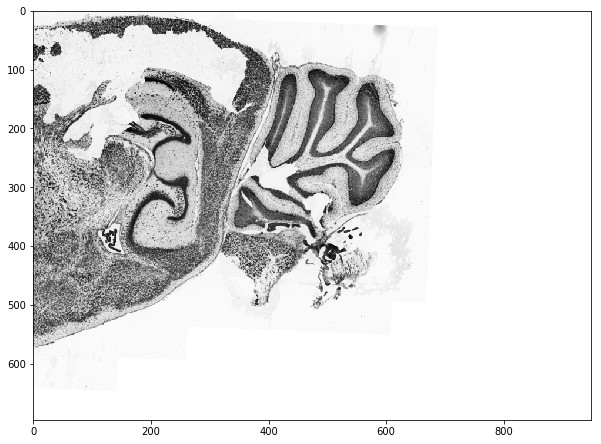

In [16]:
plt.figure(figsize=(10,10));
plt.imshow(ntb_to_nissl_map[img].astype(np.uint8), cmap=plt.cm.gray);
plt.show();

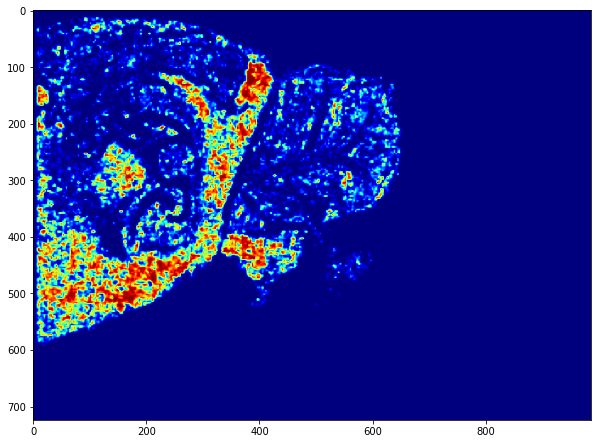

In [17]:
plt.figure(figsize=(10, 10));
plt.imshow(sm.astype(np.float), cmap=plt.cm.jet);
# plt.colorbar();

In [41]:
display_image(viz)

/home/yuncong/Brain/learning/tmp.jpg